In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['figure.figsize'] = 9, 6

In [27]:
data1

,CUST NO.,XCOORD.,YCOORD.,DEMAND,READY TIME,DUE DATE,SERVICE TIME
0,0,70,70,0,0,1351,0
1,1,33,78,20,750,809,90
2,2,59,52,20,0,1240,90
3,3,10,137,30,147,219,90
4,4,4,28,10,0,1183,90
...,...,...,...,...,...,...,...
196,196,91,108,10,0,1218,90
197,197,130,27,30,229,280,90
198,198,101,107,10,1038,1090,90
199,199,34,108,10,0,1209,90


In [28]:
data1['XCOORD.'] = data1['XCOORD.'].astype('int')
data1['YCOORD.'] = data1['YCOORD.'].astype('int')

In [29]:
data1['XCOORD.']

0       70
1       33
2       59
3       10
4        4
      ... 
196     91
197    130
198    101
199     34
200    131
Name: XCOORD., Length: 201, dtype: int64

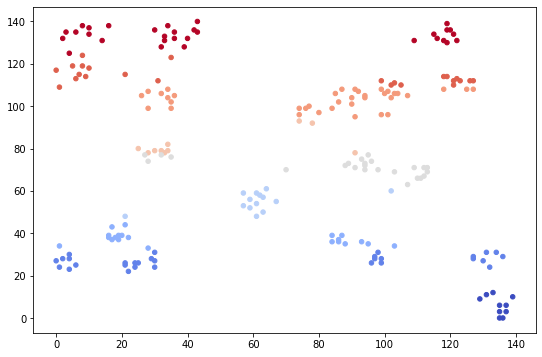

In [36]:
data1=pd.read_csv('MLC_project_data.csv')
X=data1['XCOORD.']
Y=data1["YCOORD."]
plt.gca()
plt.scatter(X,Y, s=20, c=Y, cmap=plt.cm.get_cmap('coolwarm', 9))
plt.show()